# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Kartik Bhatnagar
- Kai-Chin Shih 
- Sahana Srinivasan
- (Isaac) Fangzheng Xie 
- (Gin) Xiaojin Zheng 

# Group Members IDs

- A14020665
- A12879790
- A13741839
- A13768347
- A15674894

# Research Question

Are candidantes' trendiness on search engines, particularly Google, indicative of fundraising results?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis

Search engine trendiness figures positively correlate to campaign donorship.

# Dataset(s)

- Dataset 1 Name: BernieTrend.csv
- Link to the dataset: https://trends.google.com/trends/explore?q=%2Fm%2F01_gbv&geo=US
- Number of observations: 128 dates

- Dataset 2 Name: BernieTrend.csv
- Link to the dataset: https://www.fec.gov/data/receipts/individual-contributions/?two_year_transaction_period=2020&committee_id=C00696948&min_date=01%2F01%2F2019&max_date=12%2F31%2F2020
- Number of observations: 28170 transactions

- How we plan on combining datasets:

# Setup

In [1]:
# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

pd.options.display.max_rows = 10

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [2]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Cleaning

In [3]:
#Bernie Sanders
# Load Google Trends csv file as dataframe
dfBSTrend = pd.read_csv('bernietrend.csv')
# Set column names
dfBSTrend.columns = ['date','trend']
# Change data type from strings to number and date
dfBSTrend['trend'] = dfBSTrend['trend'].apply(pd.to_numeric, errors = 'coerce')
dfBSTrend['date'] = dfBSTrend['date'].astype('datetime64')

#Beto O'Rourke
# Load Google Trends csv file as dataframe
dfBOTrend = pd.read_csv('betotrend.csv')
# Set column names
dfBOTrend.columns = ['date','trend']
# Change data type from strings to number and date
dfBOTrend['trend'] = dfBOTrend['trend'].apply(pd.to_numeric, errors = 'coerce')
dfBOTrend['date'] = dfBOTrend['date'].astype('datetime64')

# Kamala Harris
# Load Google Trends csv file as dataframe
dfKHTrend = pd.read_csv('kamalatrend.csv')
# Set column names
dfKHTrend.columns = ['date','trend']
# Change data type from strings to number and date
dfKHTrend['trend'] = dfKHTrend['trend'].apply(pd.to_numeric, errors = 'coerce')
dfKHTrend['date'] = dfKHTrend['date'].astype('datetime64')

Text(0.5, 1.0, 'Kamala Harris Google Trendiness By Date')

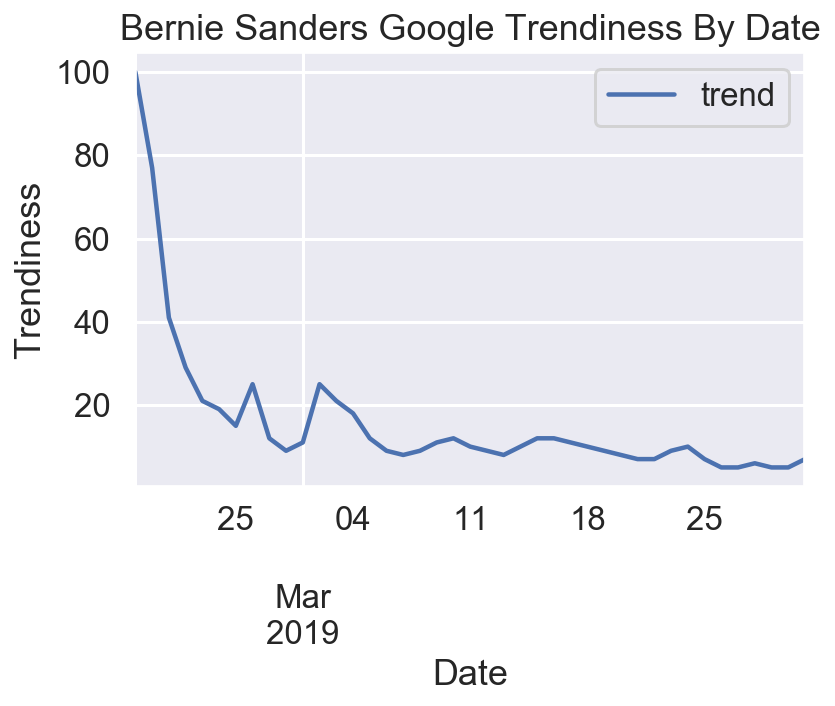

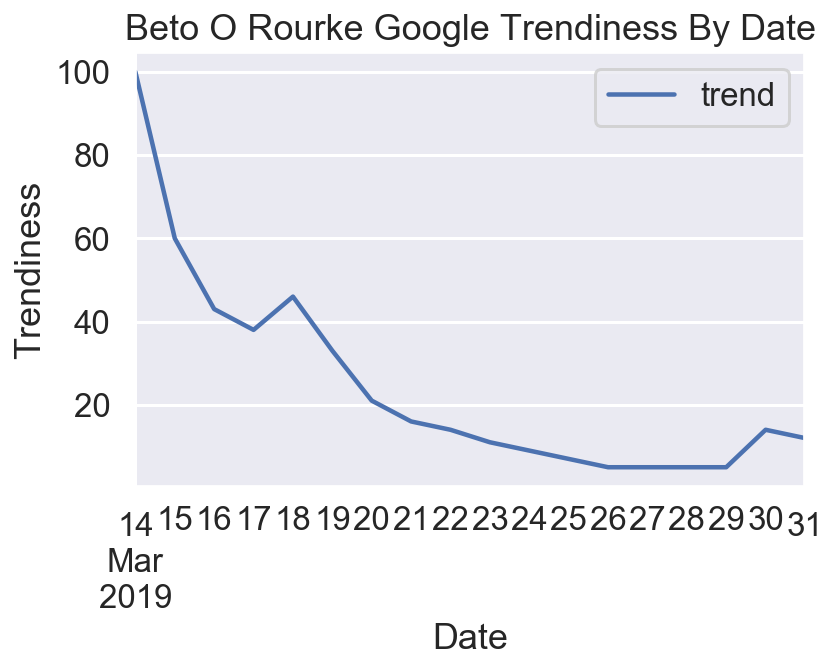

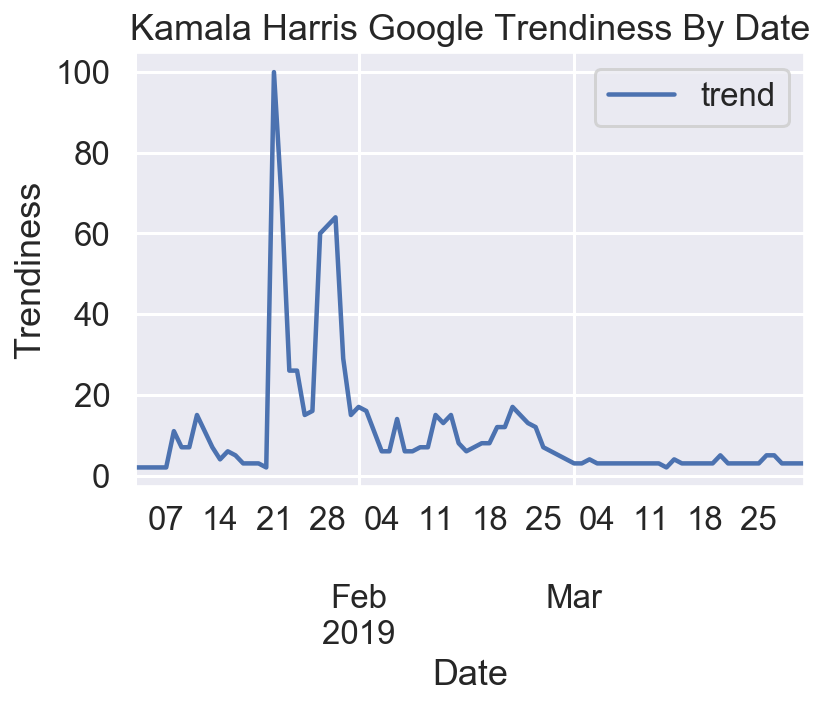

In [4]:
#Bernie Sanders
bernie = dfBSTrend.plot(x='date', y='trend')
bernie.set_xlabel('Date')
bernie.set_ylabel('Trendiness')
bernie.set_title('Bernie Sanders Google Trendiness By Date')

#Beto O'Rourke
beto = dfBOTrend.plot(x = 'date', y = 'trend')
beto.set_xlabel('Date')
beto.set_ylabel('Trendiness')
beto.set_title('Beto O Rourke Google Trendiness By Date')

# Kamala Harris
kamala = dfKHTrend.plot(x = 'date', y = 'trend') 
kamala.set_xlabel('Date')
kamala.set_ylabel('Trendiness')
kamala.set_title('Kamala Harris Google Trendiness By Date')

In [5]:
#Bernie Sanders
#Load FEC campaign contribution file as dataframe
dfBSFEC = pd.read_csv('FEC_Bernie2020.csv')
# Set column names
dfBSFEC = dfBSFEC[['transaction_id', 'contribution_receipt_date', 'contribution_receipt_amount', 'contributor_state']]
# Change data type from string to date or numeric form
dfBSFEC['contribution_receipt_date'] = dfBSFEC['contribution_receipt_date'].astype("datetime64")
dfBSFEC['contribution_receipt_amount'] = dfBSFEC['contribution_receipt_amount'].apply(pd.to_numeric)

#Beto O'Rourke
#Load FEC campaign contribution file as dataframe
dfBOFEC = pd.read_csv('FEC_Beto2020.csv')
# Set column names
dfBOFEC = dfBOFEC[['transaction_id', 'contribution_receipt_date', 'contribution_receipt_amount', 'contributor_state']]
# Change data type from string to date or numeric form
dfBOFEC['contribution_receipt_date'] = dfBOFEC['contribution_receipt_date'].astype("datetime64")
dfBOFEC['contribution_receipt_amount'] = dfBOFEC['contribution_receipt_amount'].apply(pd.to_numeric)

#Kamala Harris
#Load FEC campaign contribution file as dataframe
dfKHFEC = pd.read_csv('FEC_Kamala2020.csv')
# Set column names
dfKHFEC = dfKHFEC[['transaction_id', 'contribution_receipt_date', 'contribution_receipt_amount', 'contributor_state']]
# Change data type from string to date or numeric form
dfKHFEC['contribution_receipt_date'] = dfKHFEC['contribution_receipt_date'].astype("datetime64")
dfKHFEC['contribution_receipt_amount'] = dfKHFEC['contribution_receipt_amount'].apply(pd.to_numeric)

/Users/Sahana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Sahana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35,36,37,38,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/Sahana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (35,36,37,38,39,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'Total Contribution Amount By Date to Harris')

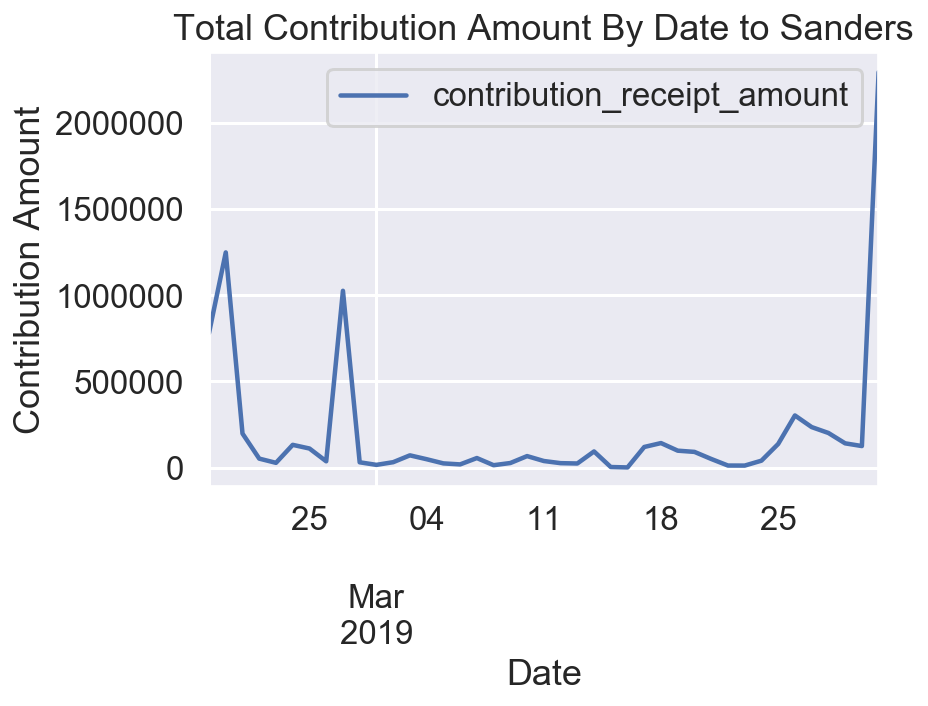

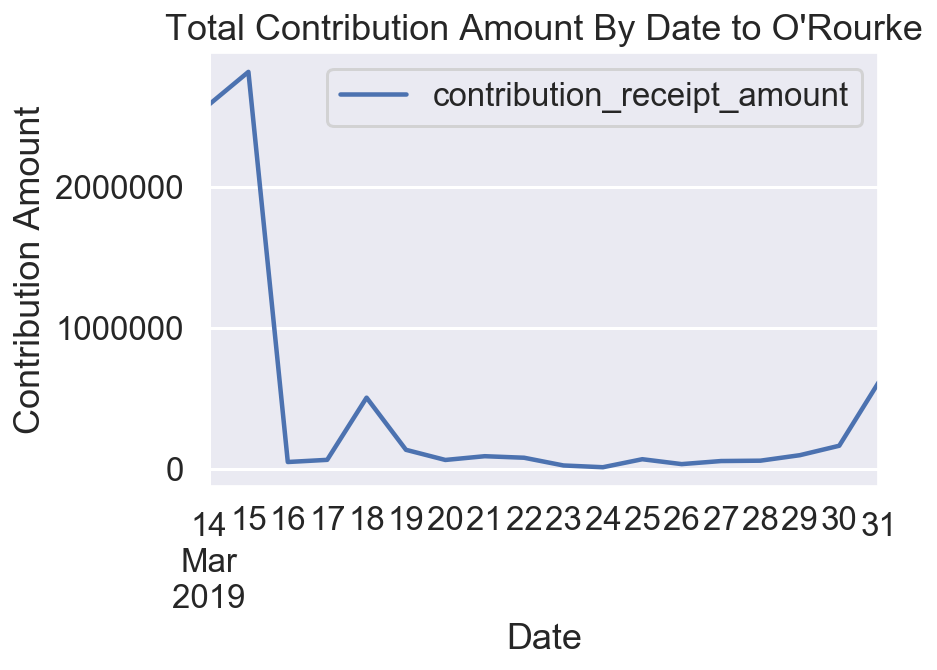

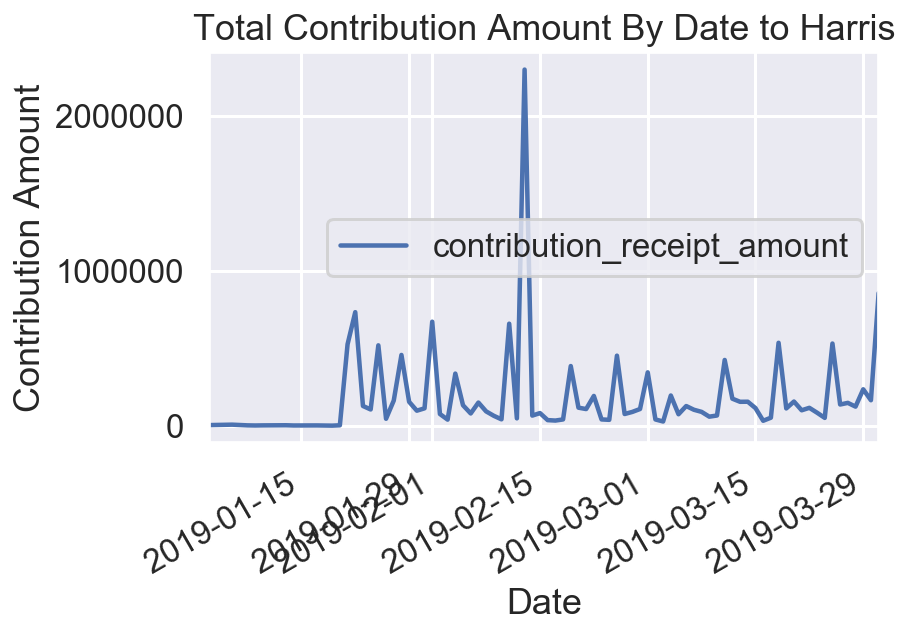

In [6]:
# Bernie Sanders
# Create pivot table to obtain total amount raised for each day
dfBSAmount = pd.pivot_table(dfBSFEC, index=['contribution_receipt_date'],values=["contribution_receipt_amount"],aggfunc=np.sum)
# Set column name as date
dfBSAmount.index.names = ['date']
# Plot Bernie daily contribution amounts
bernie2 = dfBSAmount.plot()
# Set graph appearance
bernie2.set_xlabel('Date')
bernie2.set_ylabel('Contribution Amount')
bernie2.set_title('Total Contribution Amount By Date to Sanders')

# Beto O'Rourke
# Create pivot table to obtain total amount raised for each day
dfBOAmount = pd.pivot_table(dfBOFEC, index = ['contribution_receipt_date'], values = ["contribution_receipt_amount"], aggfunc = np.sum)
# Set column name as date
dfBOAmount.index.names = ['date']
# Plot Beto daily contribution amounts
beto2 = dfBOAmount.plot() 
# Set graph appearance
beto2.set_xlabel('Date')
beto2.set_ylabel('Contribution Amount')
beto2.set_title('Total Contribution Amount By Date to O\'Rourke')

# Kamala Harris
# Create pivot table to obtain total amount raised for each day
dfKHAmount = pd.pivot_table(dfKHFEC, index = ['contribution_receipt_date'], values = ["contribution_receipt_amount"],aggfunc=np.sum)
# Set column name as date
dfKHAmount.index.names = ['date']
# Plot Kamala daily contribution amounts
kamala2 = dfKHAmount.plot()
# Set graph appearance
kamala2.set_xlabel('Date')
kamala2.set_ylabel('Contribution Amount')
kamala2.set_title('Total Contribution Amount By Date to Harris')

Text(0.5, 1.0, 'Total Transactions By Date to Harris')

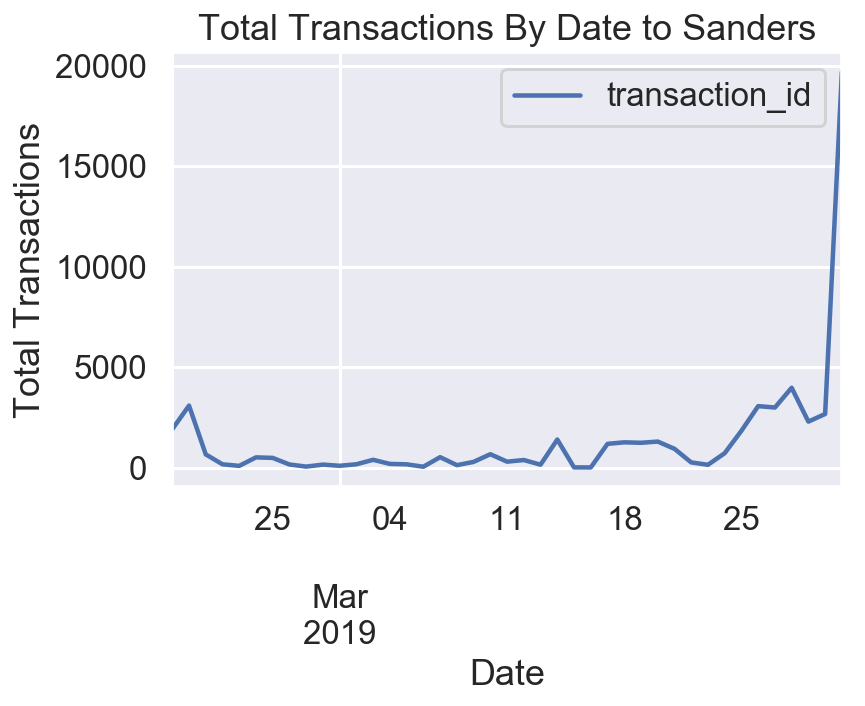

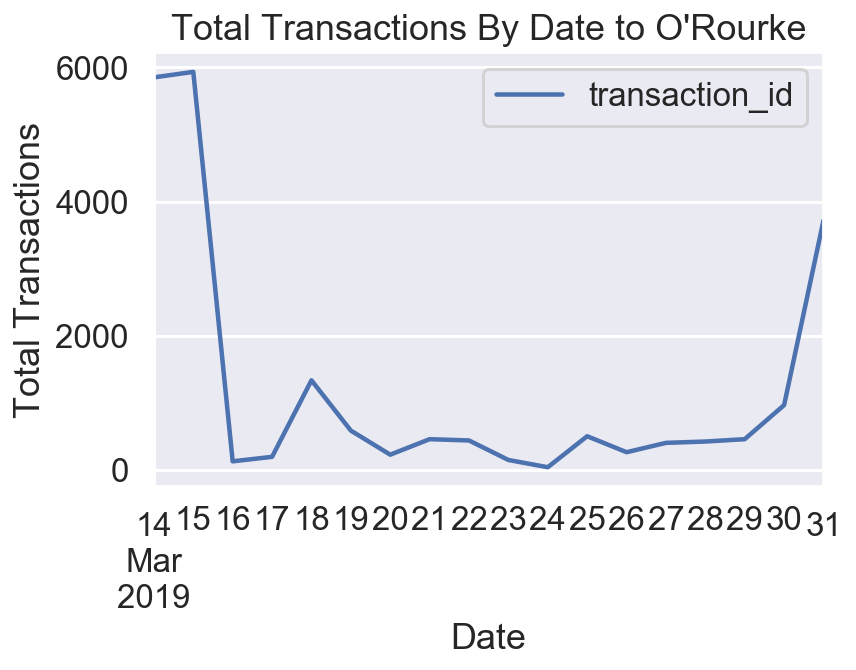

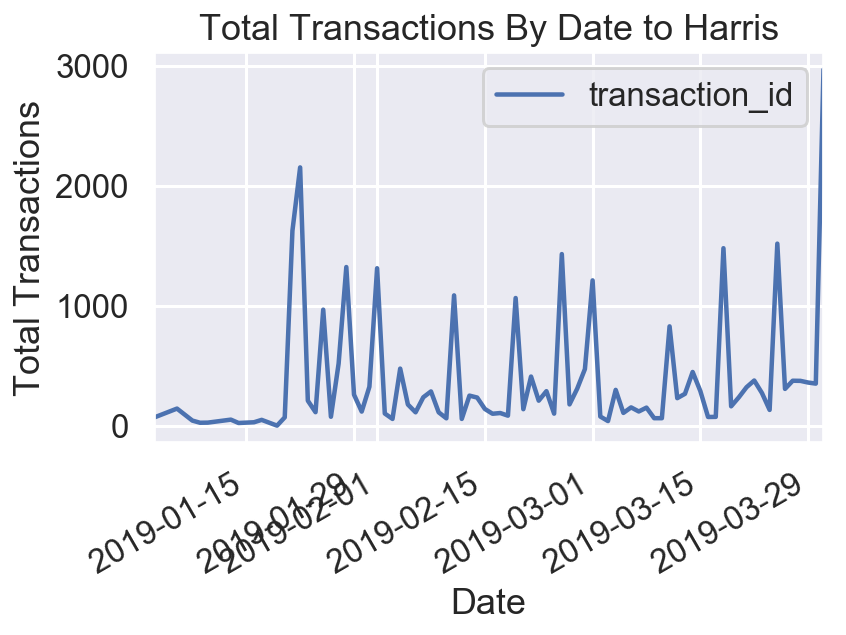

In [7]:
# Bernie Sanders
# Create pivot table to obtain total number of transactions each day
dfBSDonors = pd.pivot_table(dfBSFEC, index=["contribution_receipt_date"],values=["transaction_id"], aggfunc=lambda x: len(x.unique()))
# Set column name
dfBSDonors.index.names = ['date']
# Plot total number of transactions
bernie3 = dfBSDonors.plot()
# Set graph appearance
bernie3.set_xlabel('Date')
bernie3.set_ylabel('Total Transactions')
bernie3.set_title('Total Transactions By Date to Sanders')

# Beto O'Rourke
# Create pivot table to obtain total number of transactions each day
dfBODonors = pd.pivot_table(dfBOFEC, index=["contribution_receipt_date"],values=["transaction_id"], aggfunc=lambda x: len(x.unique()))
# Set column name
dfBODonors.index.names = ['date']
# Plot total number of transactions
beto3 = dfBODonors.plot()
# Set graph appearance
beto3.set_xlabel('Date')
beto3.set_ylabel('Total Transactions')
beto3.set_title('Total Transactions By Date to O\'Rourke')

# Kamala Harris
# Create pivot table to obtain total number of transactions each day
dfKHDonors = pd.pivot_table(dfKHFEC, index=["contribution_receipt_date"],values=["transaction_id"], aggfunc=lambda x: len(x.unique()))
# Set column name
dfKHDonors.index.names = ['date']
# Plot total number of transactions
kamala3 = dfKHDonors.plot()
# Set graph appearance
kamala3.set_xlabel('Date')
kamala3.set_ylabel('Total Transactions')
kamala3.set_title('Total Transactions By Date to Harris')

In [8]:
# Bernie Sanders
# Create pivot table to obtain total amount raised by state
dfBSStates = pd.pivot_table(dfBSFEC, index=['contributor_state'],values=["contribution_receipt_amount"],aggfunc=np.sum)
# Set column name
dfBSStates.index.names = ['state']

# Beto O'Rourke
# Create pivot table to obtain total amount raised by state
dfBOStates = pd.pivot_table(dfBOFEC, index=['contributor_state'],values=["contribution_receipt_amount"],aggfunc=np.sum)
# Set column name
dfBOStates.index.names = ['state']

# Kamala Harris
# Create pivot table to obtain total amount raised by state
dfKHStates = pd.pivot_table(dfKHFEC, index=['contributor_state'],values=["contribution_receipt_amount"],aggfunc=np.sum)
# Set column name
dfKHStates.index.names = ['state']

/Users/Sahana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/Users/Sahana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


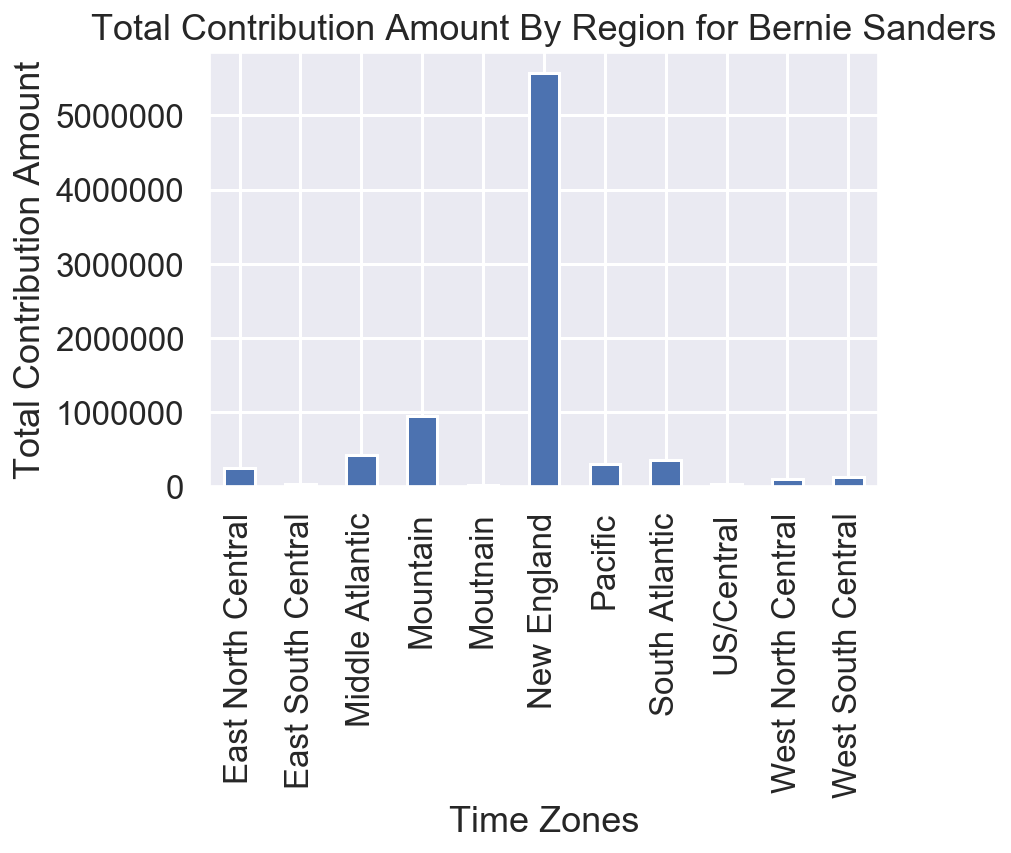

In [9]:
from collections import defaultdict
# Bernie Sanders Fundraising by timezone
# Create pivot table to obtain total amount raised by state
# This pivot table is used to aggregate contributions by timezone
dfBSCentralBureau = pd.pivot_table(dfBSFEC, index=['contributor_state'],values=["contribution_receipt_amount"],aggfunc=np.sum)
# Set column name
dfBSCentralBureau.index.names = ['state']
dfBSCentralBureau['centralbureau'] = ""
dfBSCentralBureau['centralbureau_total'] = ""

# Dictionary of state abbreviations with timezone
state2centralbureau = { 'AA': 'Pacific', 'AE': 'Pacific','AK': 'Pacific', 'AL': 'East South Central', 'AP':'Pacific', 'AR': 'West South Central', 'AS': 'Pacific', 'AZ': 'Mountain', 'CA': 'Mountain', 'CO': 'Mountain', 'CT': 'New England', 'DC': 'South Atlantic', 'DE': 'South Atlantic', 'FL': 'South Atlantic', 'GA': 'South Atlantic', 'GU': 'Pacific', 'HI': 'Pacific', 'IA': 'West North Central', 'ID': 'Mountain', 'IL': 'East North Central', 'IN': 'East North Central', 'KS': 'West North Central', 'KY': 'East South Central', 'LA': 'West South Central', 'MA': 'New England', 'MD': 'South Atlantic', 'ME': 'New England', 'MI': 'East North Central', 'MN': 'West North Central', 'MO': 'West North Central', 'MP': 'Pacific', 'MS': 'East South Central', 'MT': 'Mountain', 'NC': 'South Atlantic', 'ND': 'West North Central', 'NE': 'West North Central', 'NH': 'New England', 'NJ': 'Middle Atlantic', 'NM': 'Mountain', 'NV': 'Moutnain', 'NY': 'Middle Atlantic', 'OH': 'East North Central', 'OK': 'West South Central', 'OR': 'Pacific', 'PA': 'Middle Atlantic', 'PR': 'Pacific', 'RI': 'New England', 'SC': 'South Atlantic', 'SD': 'West North Central', 'TN': 'East South Central', 'TX': 'West South Central', 'UT': 'Mountain', 'VA': 'South Atlantic', 'VI': 'Pacific', 'VT': 'New England', 'WA': 'Pacific', 'WI': 'US/Central', 'WV': 'South Atlantic', 'WY': 'Mountain', 'ZZ':'Pacific' }
money2state = defaultdict(str)

for i, row in dfBSCentralBureau.iterrows():
    dfBSCentralBureau.set_value(i, 'timezone', state2centralbureau[i])
    
dfBSStateSum = pd.pivot_table(dfBSCentralBureau, index=['timezone'],values=["contribution_receipt_amount"],aggfunc=np.sum)
    
f1 = dfBSStateSum['contribution_receipt_amount'].plot(kind = 'bar')
#f1 = plt.gcf()
f1.set_xlabel ('Time Zones')
f1.set_ylabel ('Total Contribution Amount')
f1.set_title ('Total Contribution Amount By Region for Bernie Sanders')



#for i, row in df_bernie_fec_state.iterrows():
#    print(i, row['contribution_receipt_amount'])
for i, row in dfBSCentralBureau.iterrows():
    #print(float(df_bernie_fec_state.loc[df_bernie_fec_state.index == state2timezone[i]]["contribution_receipt_amount"]))
    dfBSCentralBureau.set_value(i, 'timezone_total', float(dfBSStateSum.loc[dfBSStateSum.index == state2centralbureau[i]]["contribution_receipt_amount"]))

#k = 0
#for i, row in df_bernie_fec.iterrows():
#    print(k, i, row['timezone_total'])
#    k+=1

In [10]:
missing_states = [0, 1, 4, 57, 14, 43, 51]
dfBSCentralBureau = dfBSCentralBureau.drop(dfBSCentralBureau.index[missing_states])
k = 0
#for i, row in df_bernie_fec.iterrows():
#    print(k, i, row['timezone_total'])
#    k+=1

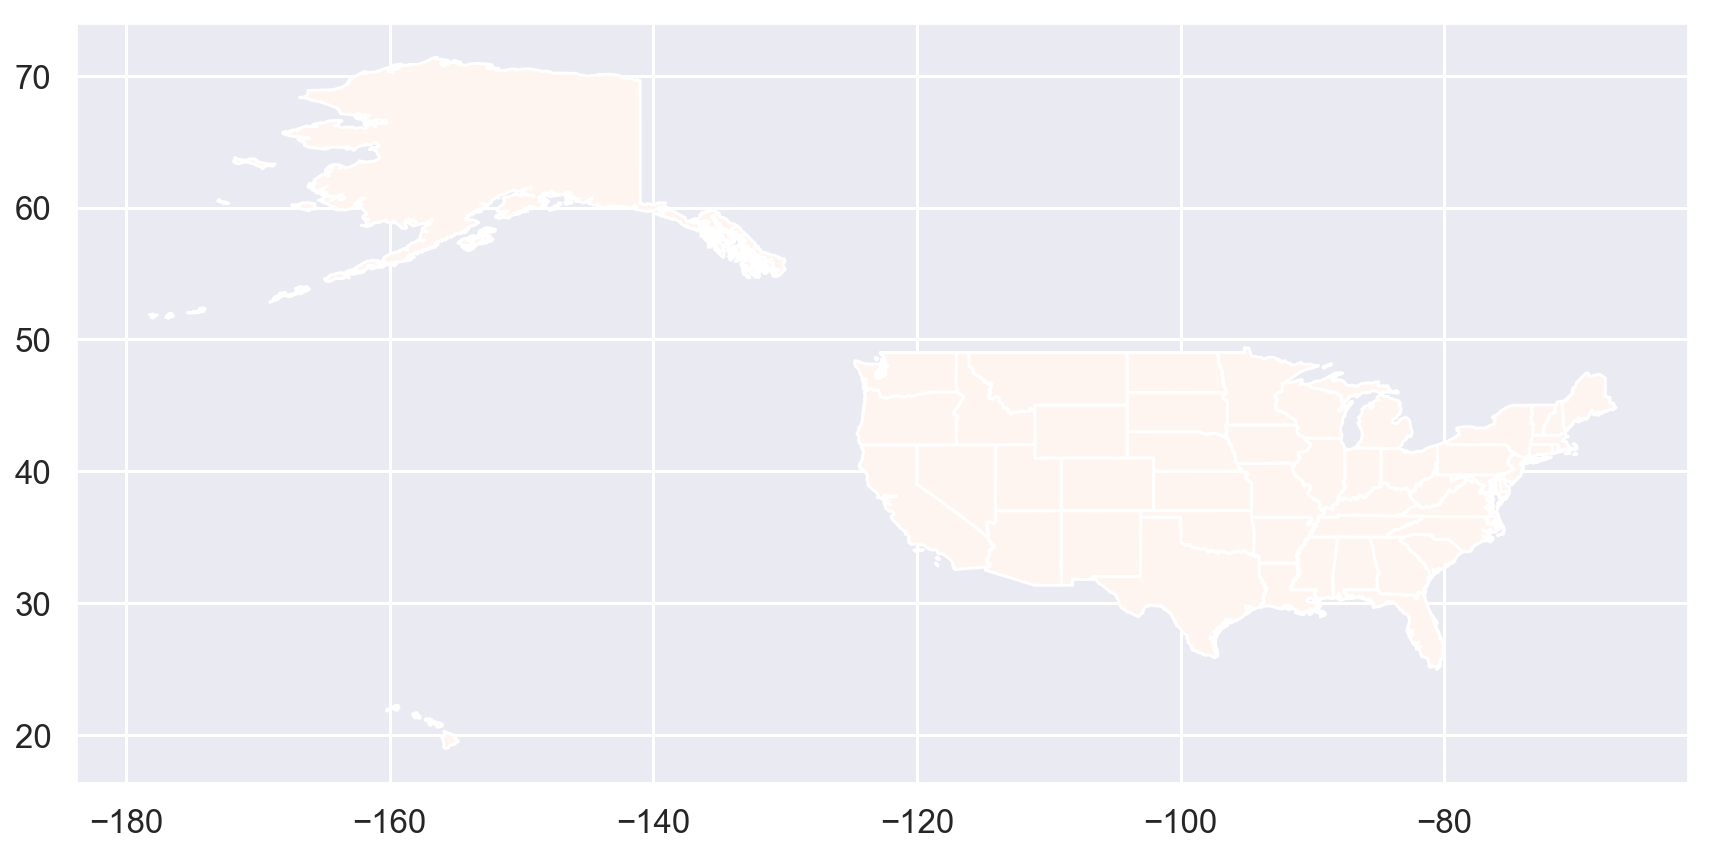

In [11]:
# Loading shape data for mapping
unitedstates = gpd.read_file('./states_21basic/states.shp')
unitedstates = unitedstates.sort_values(by=['STATE_ABBR'])

#for p, row in unitedstates.iterrows():
#    print(p, row)
# Bernie Sanders
# Plot Bernie popularity by state onto US map
iga, ax = plt.subplots(1, 1, figsize=(17, 7))
divider_b = make_axes_locatable(ax)
unitedstates.plot(column=dfBSCentralBureau['centralbureau_total'],ax=ax, cmap='Reds', legend=False);

Text(0.5, 1.0, 'Total Contribution Amount By Census Region for Bernie Sanders')

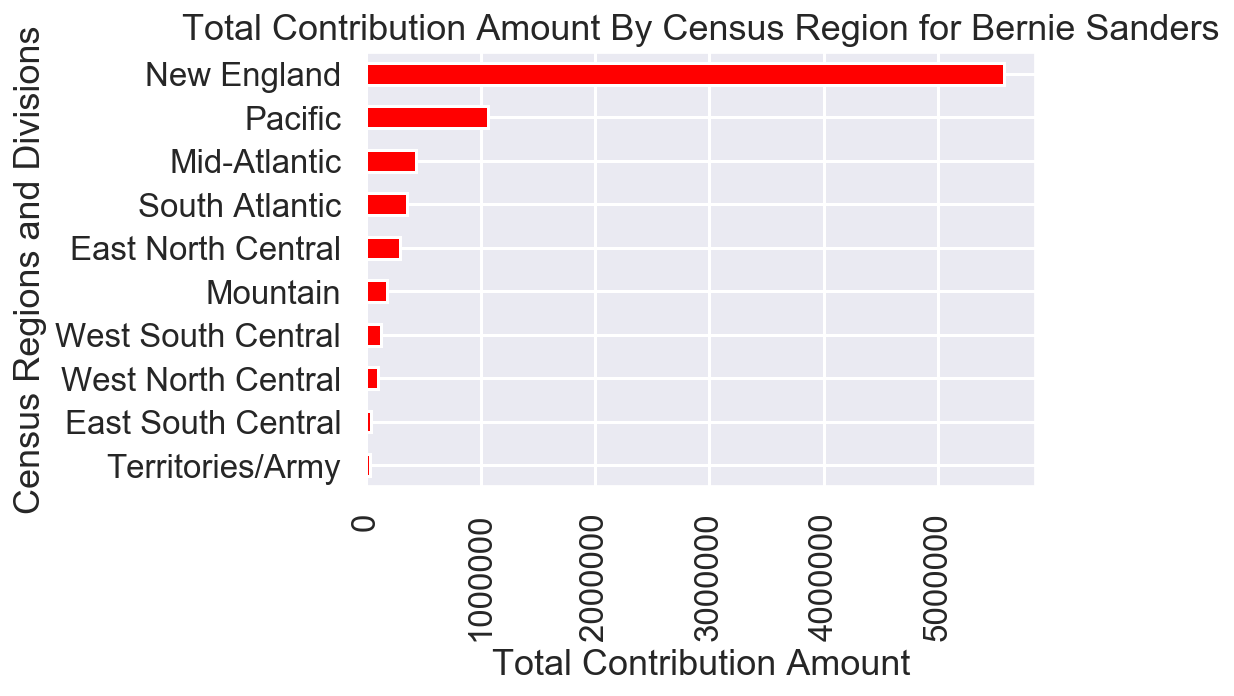

In [37]:
# Census Bureau Division Version
from collections import defaultdict
# Bernie Sanders Fundraising by USCB Division
# Create pivot table to obtain total amount raised by state
# This pivot table is used to aggregate contributions by division
dfBSDivision = pd.pivot_table(dfBSFEC, index=['contributor_state'],values=["contribution_receipt_amount"],aggfunc=np.sum)
# Set column name
dfBSDivision.index.names = ['contributor_state']
dfBSDivision['Division'] = ""
dfBSDivision['Division Total'] = ""

# Dictionary of state abbreviations with division
state2division = {'AA': 'Territories/Army', 'AE': 'Territories/Army', 'AK': 'Pacific', 'AL': 'East South Central', 'AP': 'Territories/Army', 'AR': 'West South Central', 'AS': 'Territories/Army', 'AZ': 'Mountain', 'CA': 'Pacific', 'CO': 'Mountain', 'CT': 'New England', 'DC': 'South Atlantic', 'DE': 'South Atlantic', 'FL': 'South Atlantic', 'GA': 'South Atlantic', 'GU': 'Territories/Army', 'HI': 'Pacific', 'IA': 'West North Central', 'ID': 'Mountain', 'IL': 'East North Central', 'IN': 'East North Central', 'KS': 'West North Central', 'KY': 'East South Central', 'LA': 'West South Central', 'MA': 'New England', 'MD': 'South Atlantic', 'ME': 'New England', 'MI': 'East North Central', 'MN': 'West North Central', 'MO': 'West North Central', 'MP': 'Territories/Army', 'MS': 'East South Central', 'MT': 'Mountain', 'NC': 'South Atlantic', 'ND': 'West North Central', 'NE': 'West North Central', 'NH': 'New England', 'NJ': 'Mid-Atlantic', 'NM': 'Mountain', 'NV': 'Mountain', 'NY': 'Mid-Atlantic', 'OH': 'East North Central', 'OK': 'West South Central', 'OR': 'Pacific', 'PA': 'Mid-Atlantic', 'PR': 'Territories/Army', 'RI': 'New England', 'SC': 'South Atlantic', 'SD': 'West North Central', 'TN': 'East South Central', 'TX': 'West South Central', 'UT': 'Mountain', 'VA': 'South Atlantic', 'VI': 'Territories/Army', 'VT': 'New England', 'WA': 'Pacific', 'WI': 'East North Central', 'WV': 'South Atlantic', 'WY': 'Mountain', 'ZZ': 'Territories/Army'}

# Add division data to original table
for i, row in dfBSDivision.iterrows():
    dfBSDivision.at[i,'Division'] = state2division[i]
    
# Create pivot table to obtain total amount raised in each region
dfBSDivision_State = pd.pivot_table(dfBSDivision, index=['Division'],values=["contribution_receipt_amount"],aggfunc=np.sum)

# Sort pivot table by funds raised from high to low
dfBSDivision_State = dfBSDivision_State.sort_values(by=['contribution_receipt_amount'])

# Plot ranking of amount raised
f1 = dfBSDivision_State['contribution_receipt_amount'].plot(kind='barh', color = 'red')

plt.plot()
plt.xticks(rotation = 90)

#f1.get_xaxis().setticks([rotation = 90])
f1.set_xlabel('Total Contribution Amount')
f1.set_ylabel('Census Regions and Divisions')
f1.set_title('Total Contribution Amount By Census Region for Bernie Sanders')


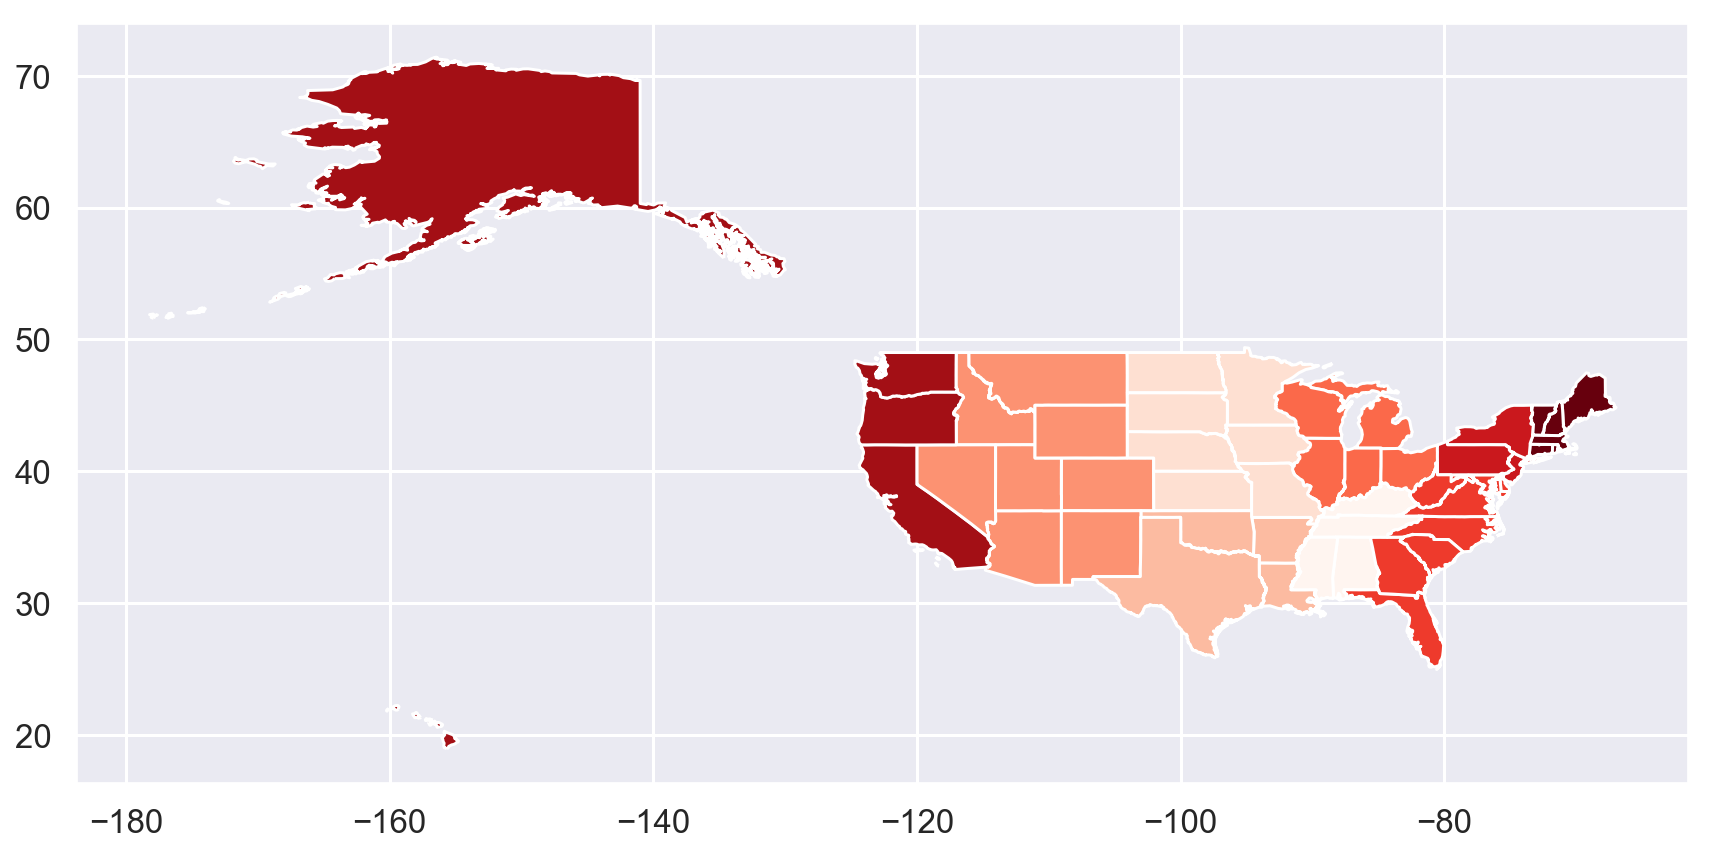

In [13]:
# Add division total to each state for mapping purposes
for i, row in dfBSDivision.iterrows():
    dfBSDivision.at[i,'Division Total'] =  float(dfBSDivision_State.loc[dfBSDivision_State.index == state2division[i]]["contribution_receipt_amount"])

# Drop territories and overseas army data as we are only mapping the 50 states + DC
missing_states = [0, 1, 4, 57, 14, 43, 51]
dfBSDivision = dfBSDivision.drop(dfBSDivision.index[missing_states])

# Loading shape data for mapping
unitedstates = gpd.read_file('./states_21basic/states.shp')
unitedstates = unitedstates.sort_values(by=['STATE_ABBR'])

# Plot amount raised in each division onto map
iga, ax = plt.subplots(1, 1, figsize=(17, 7))
divider_b = make_axes_locatable(ax)
unitedstates.plot(column=dfBSDivision['Division Total'],ax=ax, cmap='Reds', legend=False);

In [14]:
# Bernie Sanders
# Load Google Trends by state file into dataframe
dfBSTrendStates = pd.read_csv('bernietrend_state.csv')
# Set column names
dfBSTrendStates.columns = ['state','trend']
# Change data type to numeric
dfBSTrendStates['trend'] = dfBSTrendStates['trend'].apply(pd.to_numeric, errors = 'coerce')

# Beto O'Rourke
# Load Google Trends by state file into dataframe
dfBOTrendStates = pd.read_csv('betotrend_state.csv')
# Set column names
dfBOTrendStates.columns = ['state','trend']
# Change data type to numeric
dfBOTrendStates['trend'] = dfBOTrendStates['trend'].apply(pd.to_numeric, errors = 'coerce')

# Kamala Harris
# Load Google Trends by state file into dataframe
dfKHTrendStates = pd.read_csv('kamalatrend_state.csv')
# Set column names
dfKHTrendStates.columns = ['state','trend']
# Change data type to numeric
dfKHTrendStates['trend'] = dfKHTrendStates['trend'].apply(pd.to_numeric, errors = 'coerce')

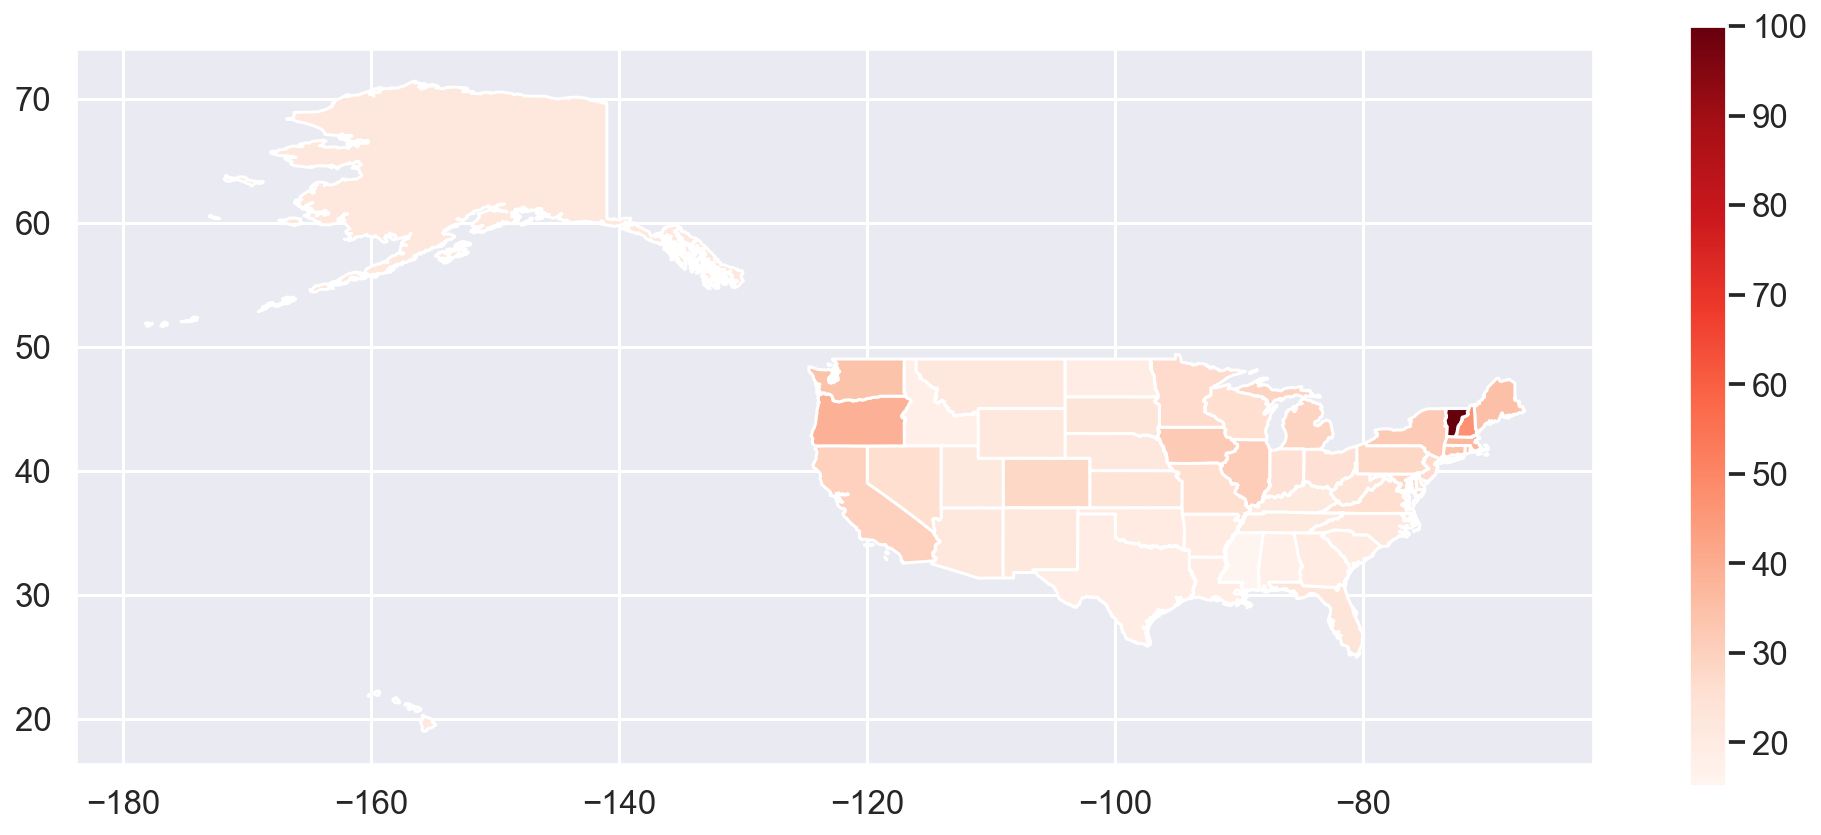

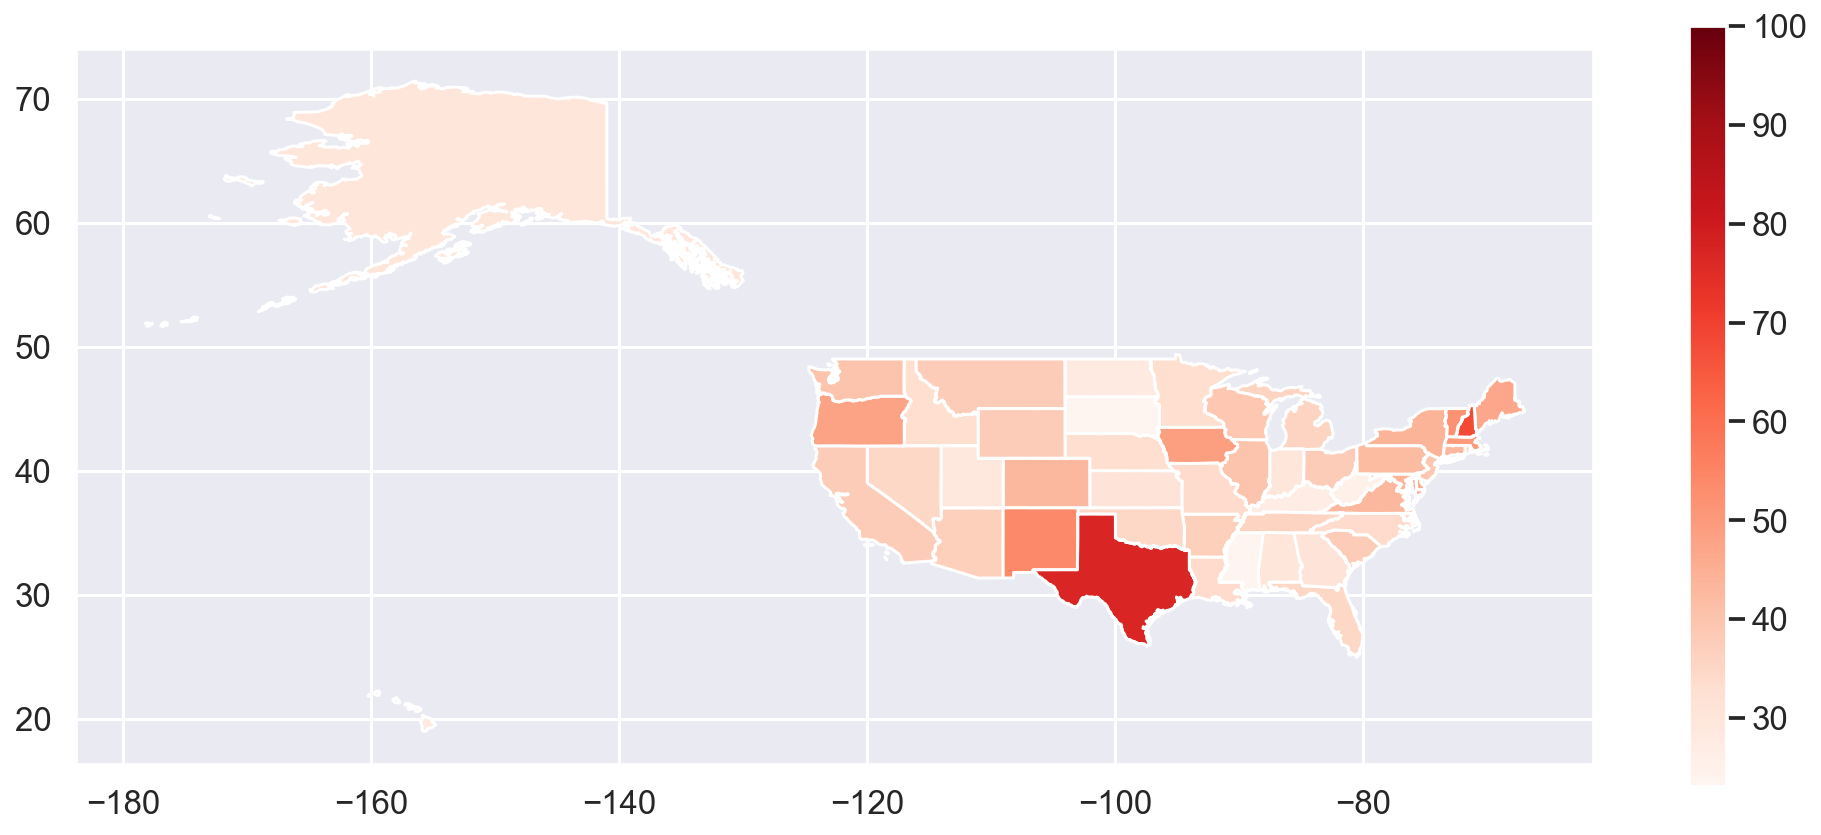

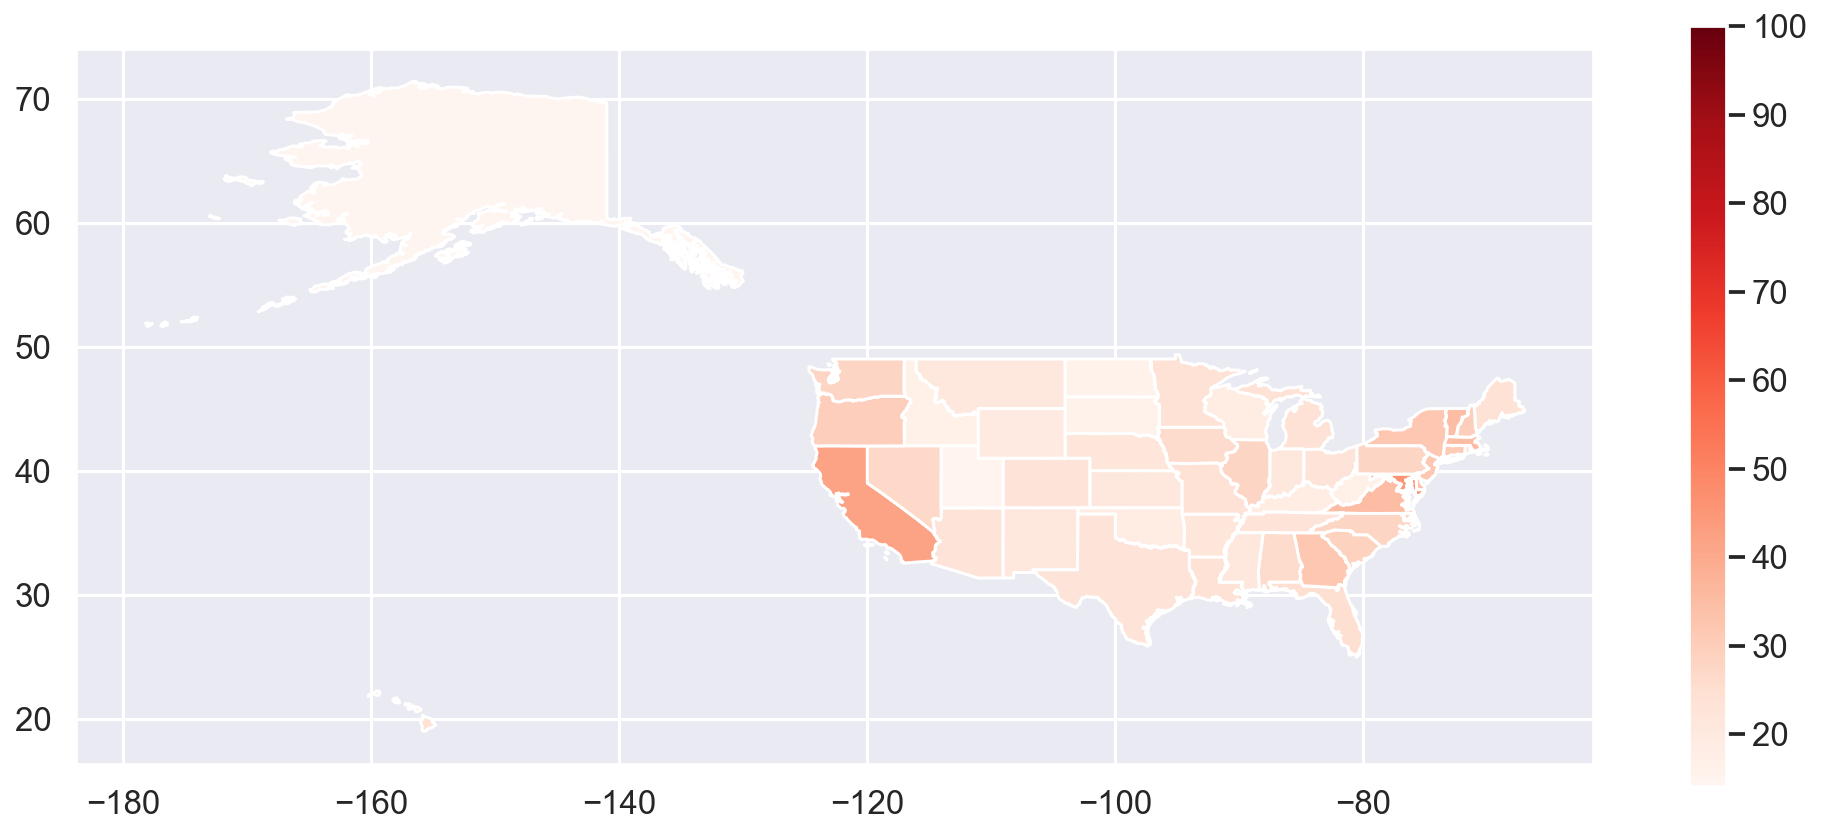

In [15]:
# Loading shape data for mapping
usa = gpd.read_file('./states_21basic/states.shp')
usa = usa.sort_values(by=['STATE_NAME'])

# Bernie Sanders
# Plot Bernie popularity by state onto US map
ig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
usa.plot(column=dfBSTrendStates['trend'],ax=ax, cmap='Reds', legend=True);

# Beto O'Rourke
# Plot Beto popularity by state onto US map
ig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
usa.plot(column=dfBOTrendStates['trend'],ax=ax, cmap='Reds', legend=True);

# Kamala Harris
# Plot Kamala popularity by state onto US map
ig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
usa.plot(column=dfKHTrendStates['trend'],ax=ax, cmap='Reds', legend=True);

# Data Analysis & Results

Correlation between interest over time and daily total donations

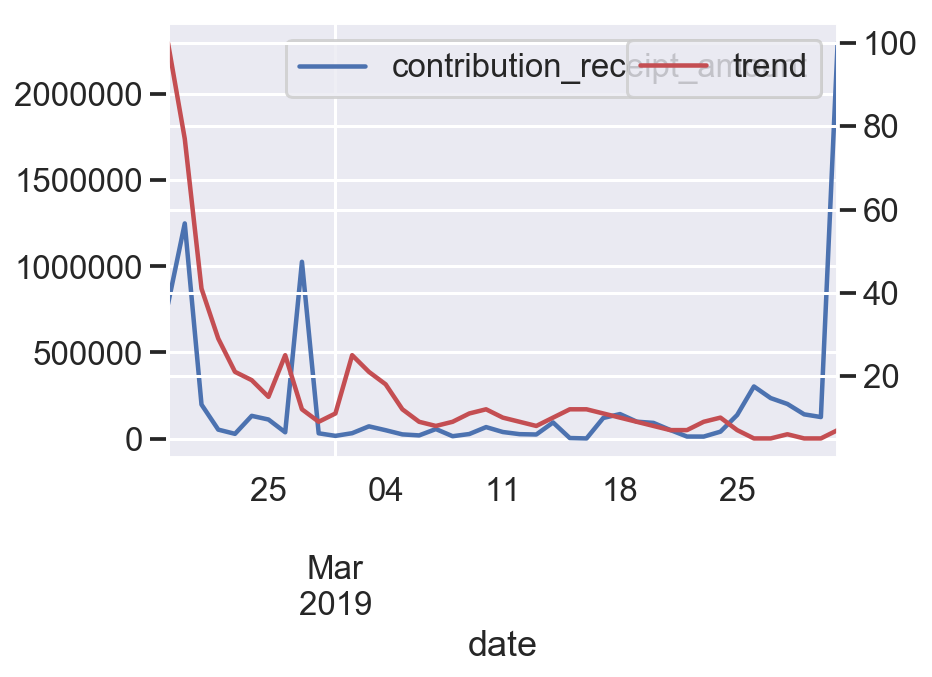

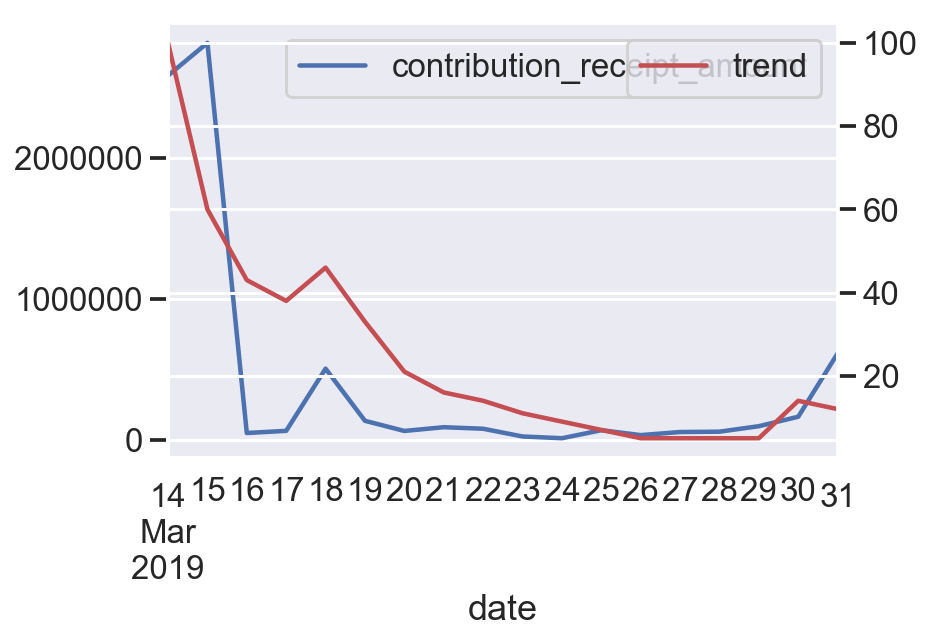

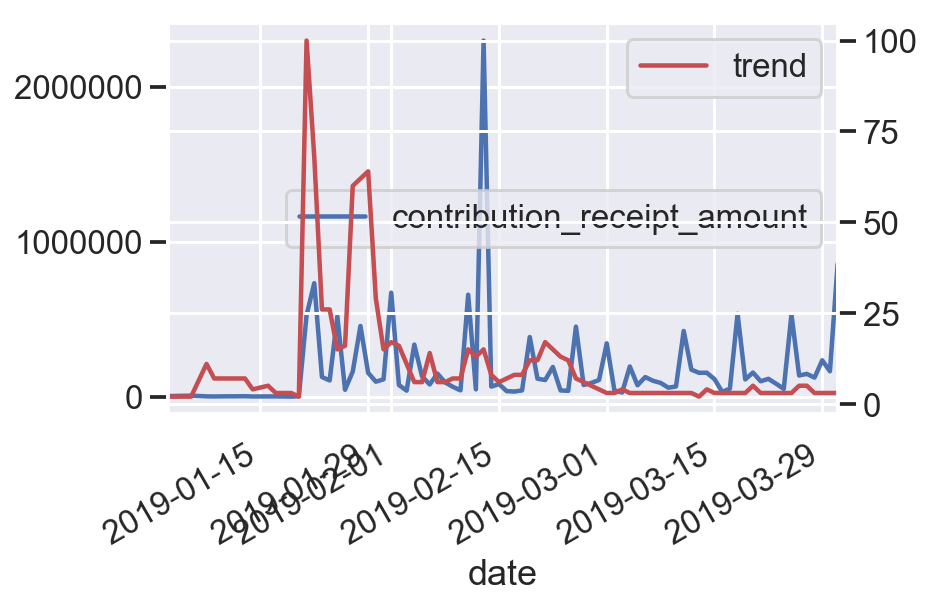

In [16]:
# Bernie Sanders
# Visually analyze correlation between Google Trends figures and total amount raised
# Merge dataframes on date
BSMerged = (pd.merge(dfBSAmount, dfBSTrend, how='outer', on='date'))
# Drop all dates when either fundraising amount was missing or trend data was missing
BSMerged = BSMerged.dropna()
# Plot trends and amount
ax = BSMerged.plot('date','contribution_receipt_amount')
ax1 = ax.twinx()
BSMerged.plot('date','trend',ax=ax1, color='r')

# Beto O'Rourke
# Visually analyze correlation between Google Trends figures and total amount raised
# Merge dataframes on date
BOMerged = (pd.merge(dfBOAmount, dfBOTrend, how='outer', on='date'))
# Drop all dates when either fundraising amount was missing or trend data was missing
BOMerged = BOMerged.dropna()
# Plot trends and amount
ax = BOMerged.plot('date','contribution_receipt_amount')
ax1 = ax.twinx()
BOMerged.plot('date','trend',ax=ax1, color='r')

# Kamala Harris
# Visually analyze correlation between Google Trends figures and total amount raised
# Merge dataframes on date
KHMerged = (pd.merge(dfKHAmount, dfKHTrend, how='outer', on='date'))
# Drop all dates when either fundraising amount was missing or trend data was missing
KHMerged = KHMerged.dropna()
# Plot trends and amount
ax = KHMerged.plot('date','contribution_receipt_amount')
ax1 = ax.twinx()
KHMerged.plot('date','trend',ax=ax1, color='r')

Correlation between interest over time and daily total transactions

In [17]:
# Bernie Sanders
# Analyze correlation between Google Trends figures and total amount raised
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("contribution_receipt_amount~trend", BSMerged)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                                 OLS Regression Results                                
Dep. Variable:     contribution_receipt_amount   R-squared:                       0.114
Model:                                     OLS   Adj. R-squared:                  0.091
Method:                          Least Squares   F-statistic:                     5.022
Date:                         Thu, 06 Jun 2019   Prob (F-statistic):             0.0308
Time:                                 01:14:18   Log-Likelihood:                -586.67
No. Observations:                           41   AIC:                             1177.
Df Residuals:                               39   BIC:                             1181.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The result shows that in the Bernie Sander's case, the the Google trend statistically correlates with total amount raised since the coef is not zero and P value is smaller that 0.05.

In [18]:
# Beto O'Rourke
# Analyze correlation between Google Trends figures and total amount raised
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("contribution_receipt_amount~trend", BOMerged)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                                 OLS Regression Results                                
Dep. Variable:     contribution_receipt_amount   R-squared:                       0.642
Model:                                     OLS   Adj. R-squared:                  0.620
Method:                          Least Squares   F-statistic:                     28.72
Date:                         Thu, 06 Jun 2019   Prob (F-statistic):           6.39e-05
Time:                                 01:14:18   Log-Likelihood:                -261.47
No. Observations:                           18   AIC:                             526.9
Df Residuals:                               16   BIC:                             528.7
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/Sahana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


The result shows that in the Beto O'Rourke's case, the the Google trend statistically correlates with total amount raised since the coef is not zero and P value is 0.

In [19]:
# Kamala Harris
# Analyze correlation between Google Trends figures and total amount raised
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("contribution_receipt_amount~trend", KHMerged)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                                 OLS Regression Results                                
Dep. Variable:     contribution_receipt_amount   R-squared:                       0.058
Model:                                     OLS   Adj. R-squared:                  0.046
Method:                          Least Squares   F-statistic:                     4.844
Date:                         Thu, 06 Jun 2019   Prob (F-statistic):             0.0307
Time:                                 01:14:18   Log-Likelihood:                -1134.3
No. Observations:                           81   AIC:                             2273.
Df Residuals:                               79   BIC:                             2277.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The result shows that in the Kamala Harris's case, the the Google trend statistically correlates with total amount raised since the coef is not zero and P value is smaller than 0.05.

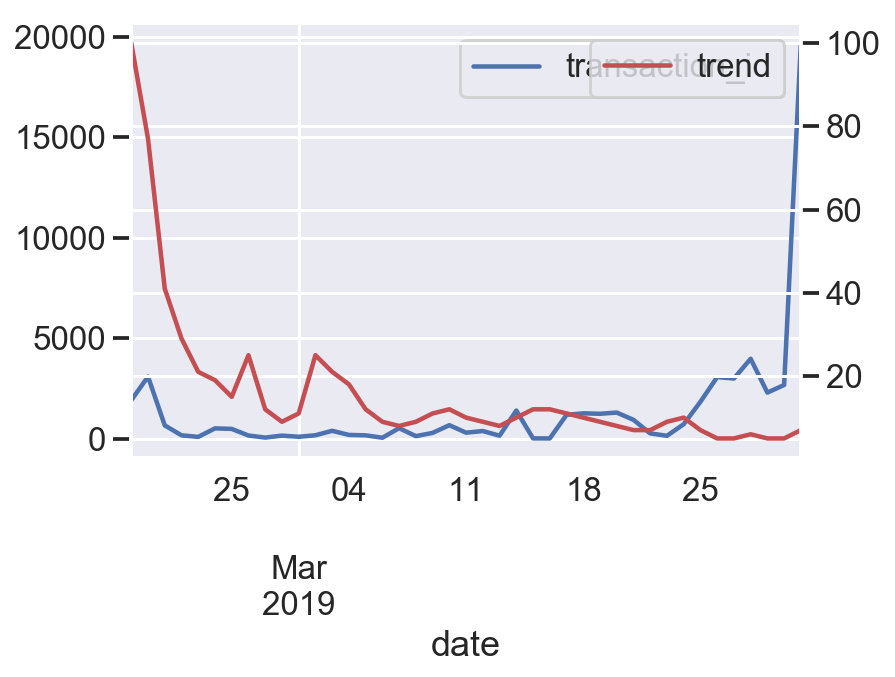

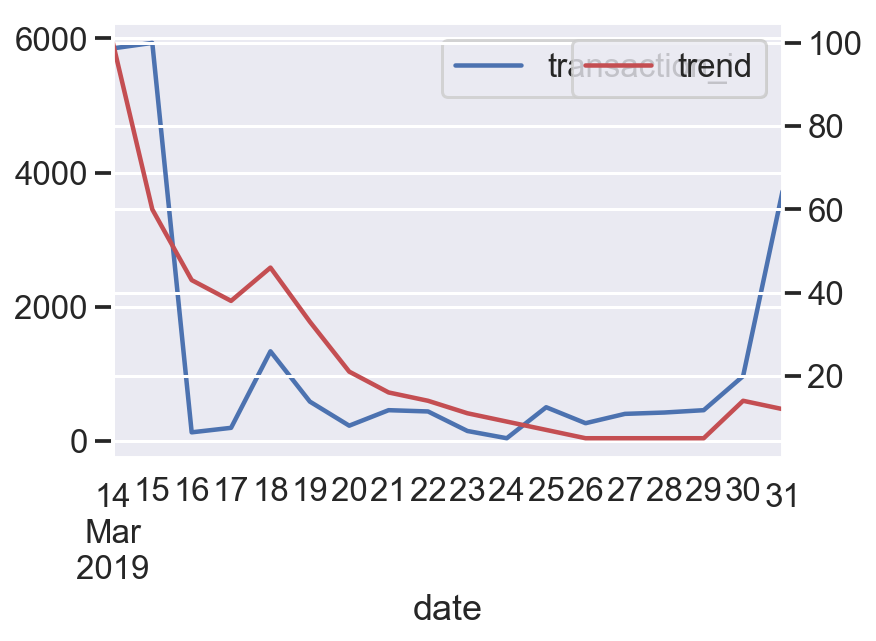

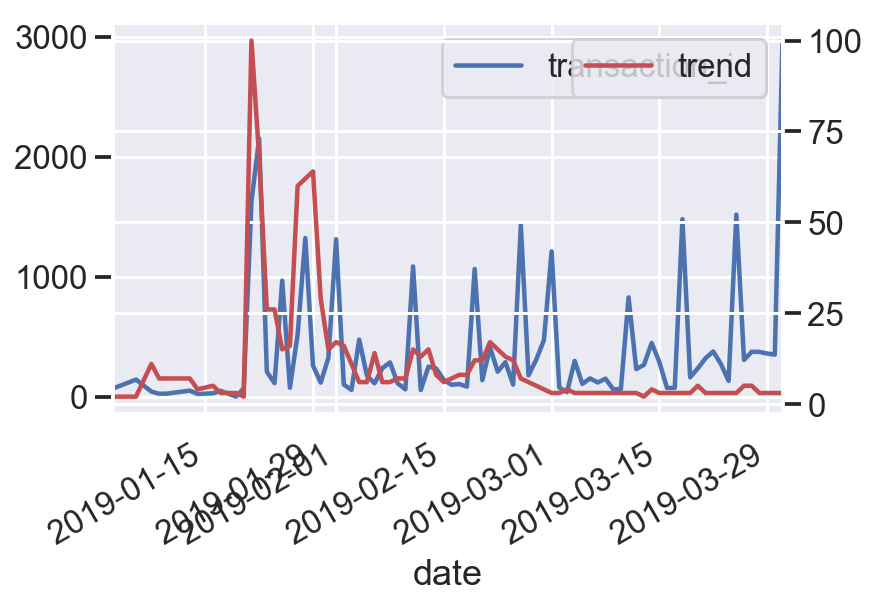

In [20]:
# Bernie Sanders
# Visually analyze correlation between Google Trends figures and total number of transactions each day
# Merge dataframes on date
BSMerged2 = (pd.merge(dfBSDonors, dfBSTrend, how='outer', on='date'))
# Drop all dates when either fundraising amount was missing or trend data was missing
BSMerged2 = BSMerged2.dropna()
# Plot trends and counts
ax = BSMerged2.plot('date','transaction_id')
ax1 = ax.twinx()
BSMerged2.plot('date','trend',ax=ax1, color='r')


# Beto O'Rourke
# Visually analyze correlation between Google Trends figures and total number of transactions each day
# Merge dataframes on date
BOMerged2 = (pd.merge(dfBODonors, dfBOTrend, how='outer', on='date'))
# Drop all dates when either fundraising amount was missing or trend data was missing
BOMerged2 = BOMerged2.dropna()
# Plot trends and counts
ax = BOMerged2.plot('date','transaction_id')
ax1 = ax.twinx()
BOMerged2.plot('date','trend',ax=ax1, color='r')

# Kamala Harris
# Visually analyze correlation between Google Trends figures and total number of transactions each day
# Merge dataframes on date
KHMerged2 = (pd.merge(dfKHDonors, dfKHTrend, how='outer', on='date'))
# Drop all dates when either fundraising amount was missing or trend data was missing
KHMerged2 = KHMerged2.dropna()
# Plot trends and counts
ax = KHMerged2.plot('date','transaction_id')
ax1 = ax.twinx()
KHMerged2.plot('date','trend',ax=ax1, color='r')

Correlation between interest by state and total funds raised to-date by state

In [21]:
# Bernie Sanders
# Analyze correlation between Google Trends figures and total number of transactions each day
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("transaction_id~trend", BSMerged2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         transaction_id   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.02265
Date:                Thu, 06 Jun 2019   Prob (F-statistic):              0.881
Time:                        01:14:20   Log-Likelihood:                -387.36
No. Observations:                  41   AIC:                             778.7
Df Residuals:                      39   BIC:                             782.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1426.3240    655.198      2.177      0.0

Based on the OLS Regression Results, Google Trends is not statistically siginificant to total number of transactions each day since P value is much larger than 0.05.

In [22]:
# Beto O'Rourke
# Analyze correlation between Google Trends figures and total number of transactions each day
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("transaction_id~trend", BOMerged2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         transaction_id   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     17.10
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           0.000777
Time:                        01:14:20   Log-Likelihood:                -154.27
No. Observations:                  18   AIC:                             312.5
Df Residuals:                      16   BIC:                             314.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.4215    453.411     -0.228      0.8

/Users/Sahana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


In Beto O'Rourke's case, the Google trends is statistically correlated to total number of transactions each day, since the coef is not zero and P value smaller than 0.05.

In [23]:
# Kamala Harris
# Analyze correlation between Google Trends figures and total number of transactions each day
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("transaction_id~trend", KHMerged2)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         transaction_id   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     12.48
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           0.000690
Time:                        01:14:20   Log-Likelihood:                -616.98
No. Observations:                  81   AIC:                             1238.
Df Residuals:                      79   BIC:                             1243.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    257.5300     66.713      3.860      0.0

In Kamala Harris's case, the Google trends is statistically correlated to total number of transactions each day, since the coef is not zero and P value smaller than 0.05.

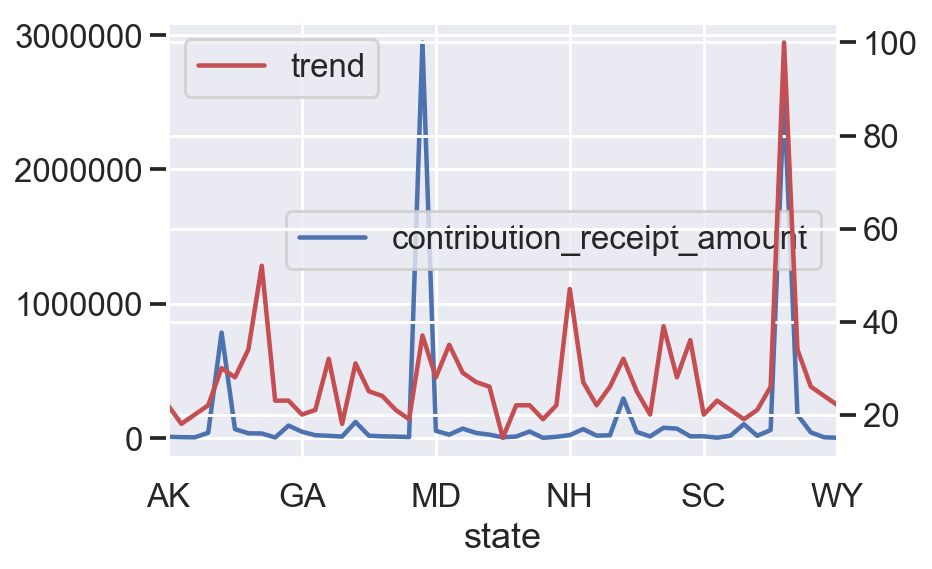

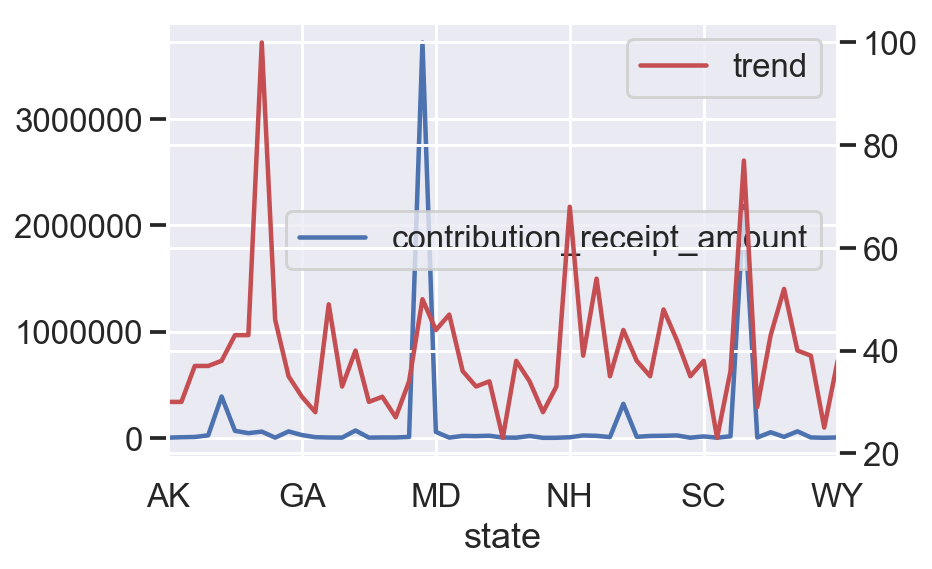

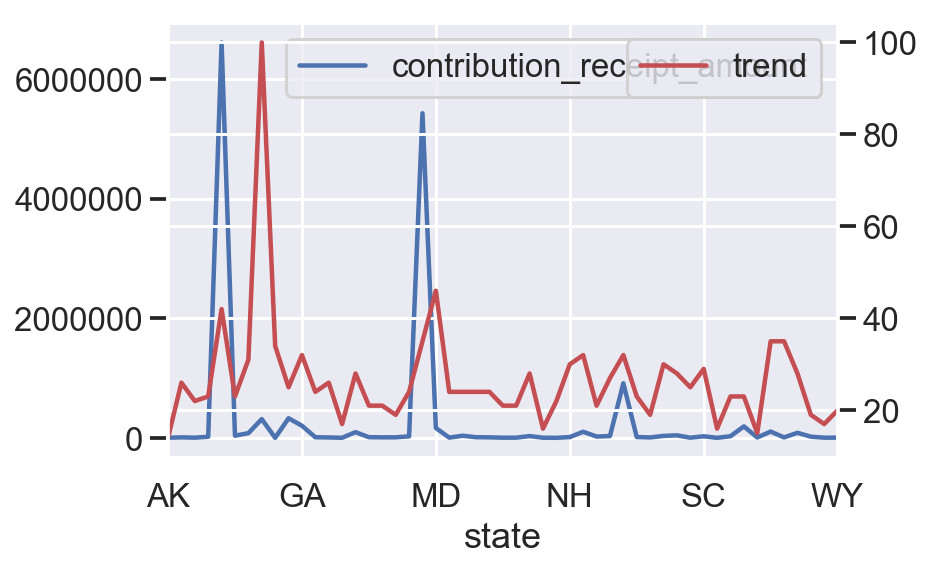

In [24]:
# Bernie Sanders
# Visually analyze correlation between Google Trends figures and total amount raised by states 
# Merge dataframes on state
BSMerged3 = (pd.merge(dfBSStates, dfBSTrendStates, how='outer', on='state'))
# Drop all states when either fundraising amount was missing or trend data was missing
BSMerged3 = BSMerged3.dropna()
# Plot trends and amount
ax = BSMerged3.plot('state','contribution_receipt_amount')
ax1 = ax.twinx()
BSMerged3.plot('state','trend',ax=ax1, color='r')


# Beto O'Rourke
# Visually analyze correlation between Google Trends figures and total amount raised by states 
# Merge dataframes on state
BOMerged3 = (pd.merge(dfBOStates, dfBOTrendStates, how='outer', on='state'))
# Drop all states when either fundraising amount was missing or trend data was missing
BOMerged3 = BOMerged3.dropna()
# Plot trends and amount
ax = BOMerged3.plot('state','contribution_receipt_amount')
ax1 = ax.twinx()
BOMerged3.plot('state','trend',ax=ax1, color='r')

# Kamala Harris
# Visually analyze correlation between Google Trends figures and total amount raised by states 
# Merge dataframes on state
KHMerged3 = (pd.merge(dfKHStates, dfKHTrendStates, how='outer', on='state'))
# Drop all states when either fundraising amount was missing or trend data was missing
KHMerged3 = KHMerged3.dropna()
# Plot trends and amount
ax = KHMerged3.plot('state','contribution_receipt_amount')
ax1 = ax.twinx()
KHMerged3.plot('state','trend',ax=ax1, color='r')

In [25]:
# Bernie Sanders
# Analyze correlation between Google Trends figures and total amount raised by states
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("contribution_receipt_amount~trend", BSMerged3)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                                 OLS Regression Results                                
Dep. Variable:     contribution_receipt_amount   R-squared:                       0.398
Model:                                     OLS   Adj. R-squared:                  0.386
Method:                          Least Squares   F-statistic:                     32.42
Date:                         Thu, 06 Jun 2019   Prob (F-statistic):           6.92e-07
Time:                                 01:14:21   Log-Likelihood:                -732.16
No. Observations:                           51   AIC:                             1468.
Df Residuals:                               49   BIC:                             1472.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In Bernie Sander's case, the Google trends is statistically correlated to the total amount raised by states, since the coef is not zero and P value smaller than 0.05.

In [26]:
# Beto O'Rourke
# Analyze correlation between Google Trends figures and total amount raised by states
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("contribution_receipt_amount~trend", BOMerged3)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                                 OLS Regression Results                                
Dep. Variable:     contribution_receipt_amount   R-squared:                       0.100
Model:                                     OLS   Adj. R-squared:                  0.081
Method:                          Least Squares   F-statistic:                     5.424
Date:                         Thu, 06 Jun 2019   Prob (F-statistic):             0.0240
Time:                                 01:14:21   Log-Likelihood:                -747.42
No. Observations:                           51   AIC:                             1499.
Df Residuals:                               49   BIC:                             1503.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In Beto O'Rourke's case, the Google trends is statistically correlated to the total amount raised by states, since the coef is not zero and P value smaller than 0.05.

In [27]:
# Kamala Harris
# Analyze correlation between Google Trends figures and total amount raised by states
# Looking for the correlation between by applying OLS linear regression
outcome_1, predictors_1 = patsy.dmatrices("contribution_receipt_amount~trend", KHMerged3)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                                 OLS Regression Results                                
Dep. Variable:     contribution_receipt_amount   R-squared:                       0.059
Model:                                     OLS   Adj. R-squared:                  0.040
Method:                          Least Squares   F-statistic:                     3.066
Date:                         Thu, 06 Jun 2019   Prob (F-statistic):             0.0862
Time:                                 01:14:21   Log-Likelihood:                -783.47
No. Observations:                           51   AIC:                             1571.
Df Residuals:                               49   BIC:                             1575.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In Kamala Harris's case, the Google Trends is not statistically significant to total amount riased by states since P value is relatively large. 

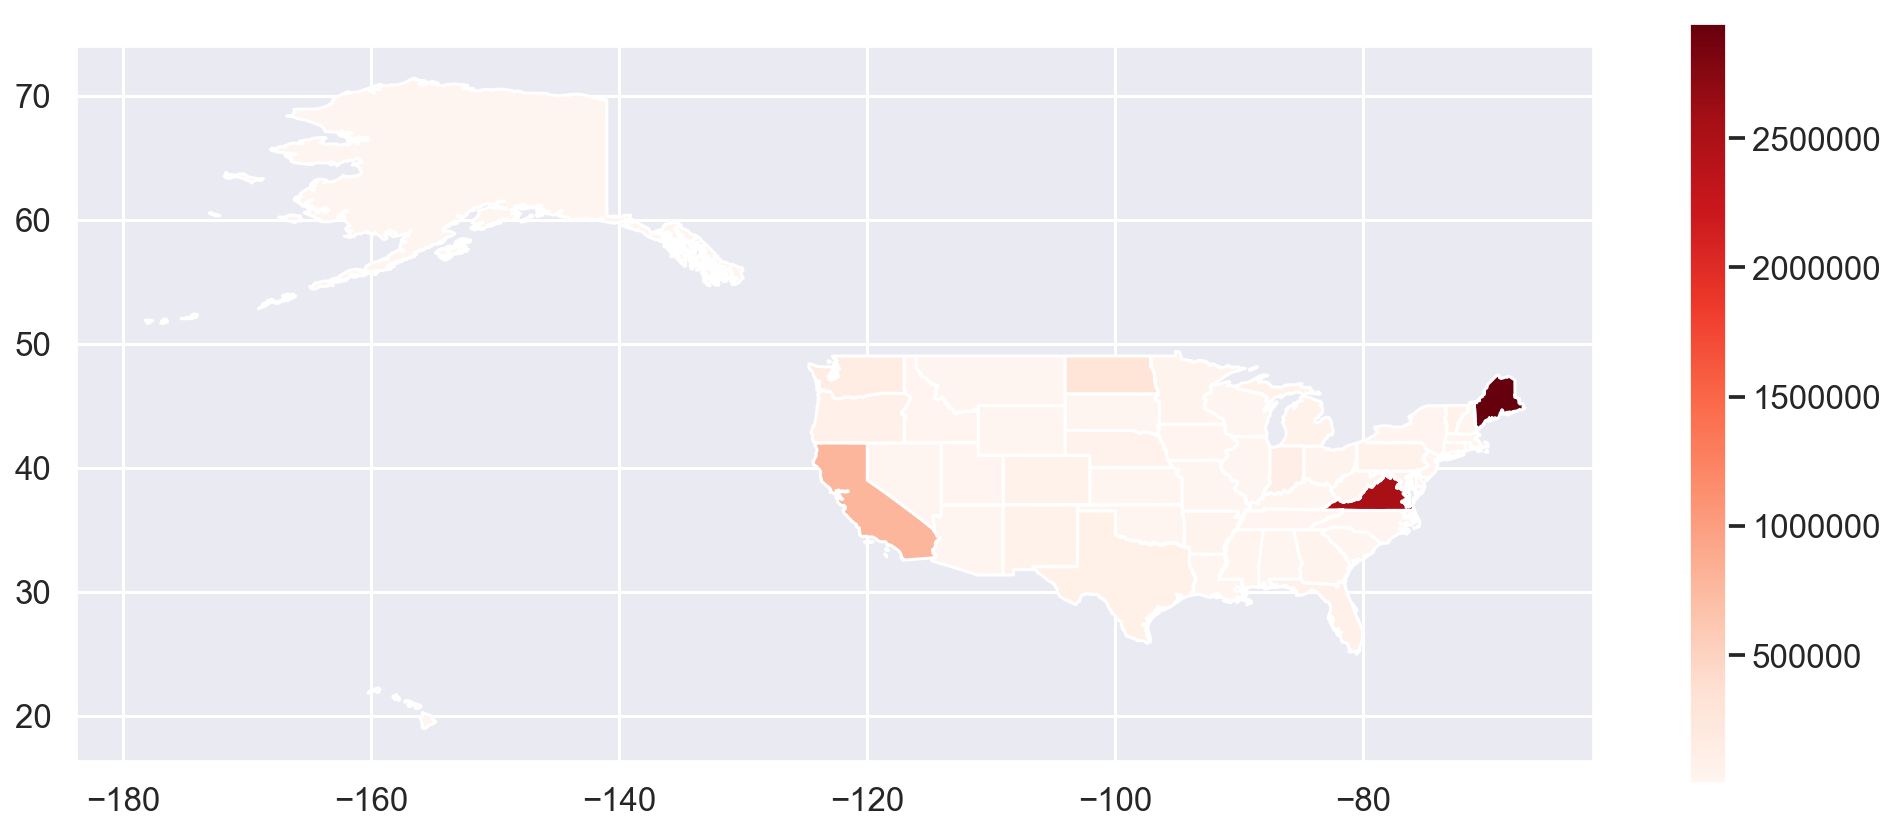

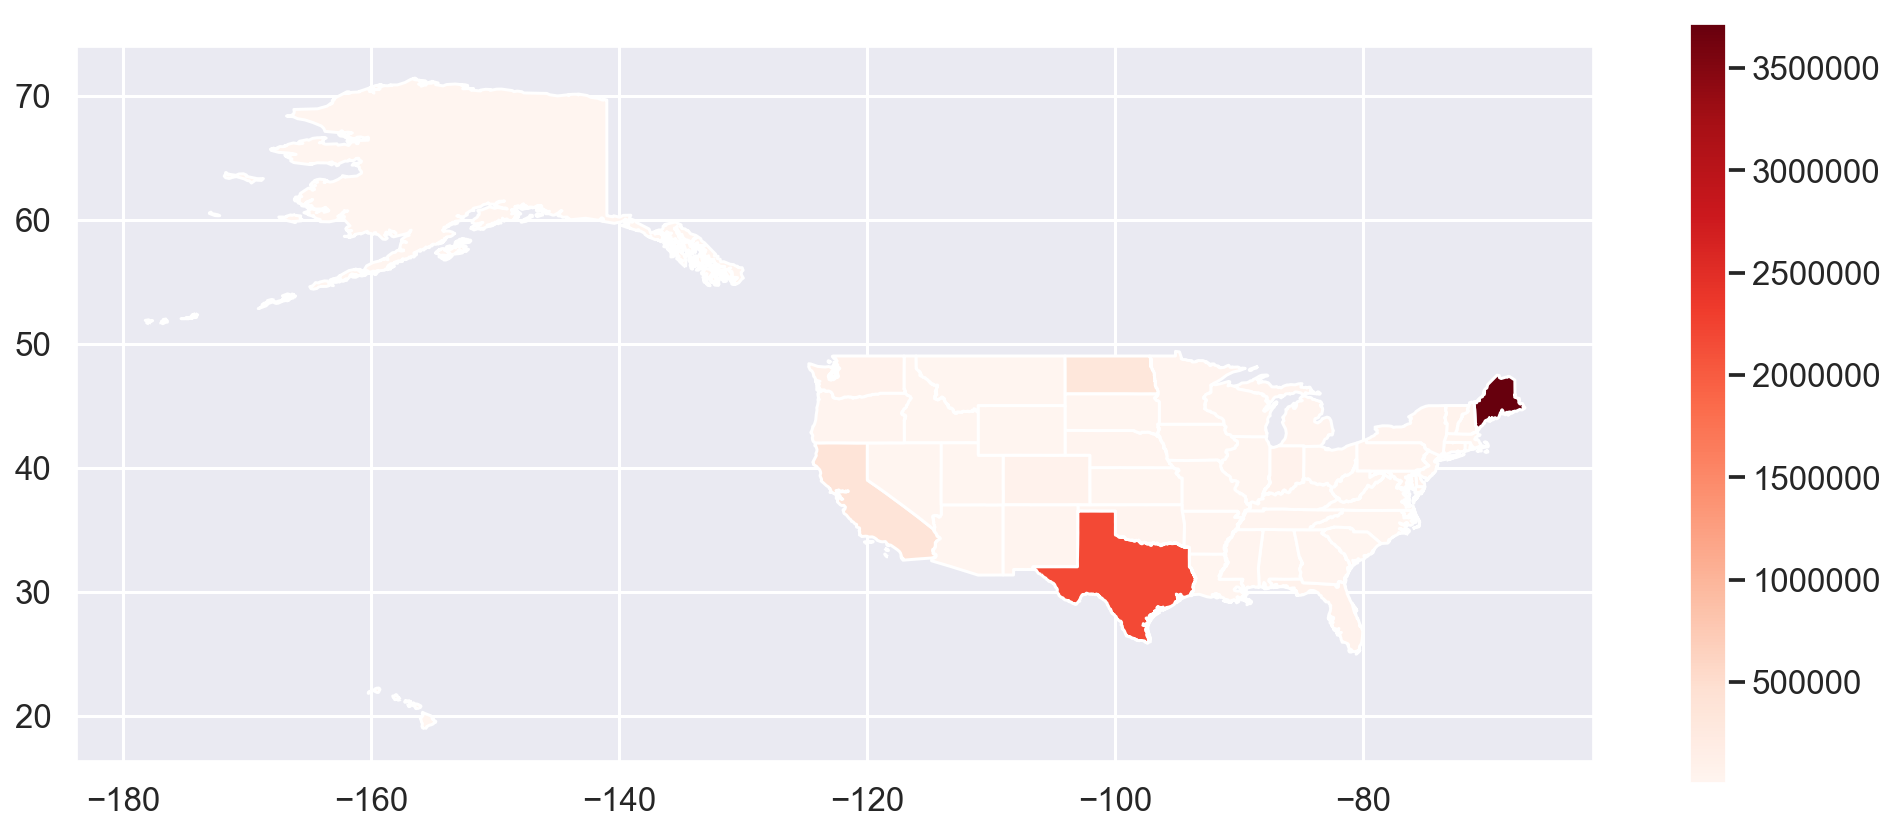

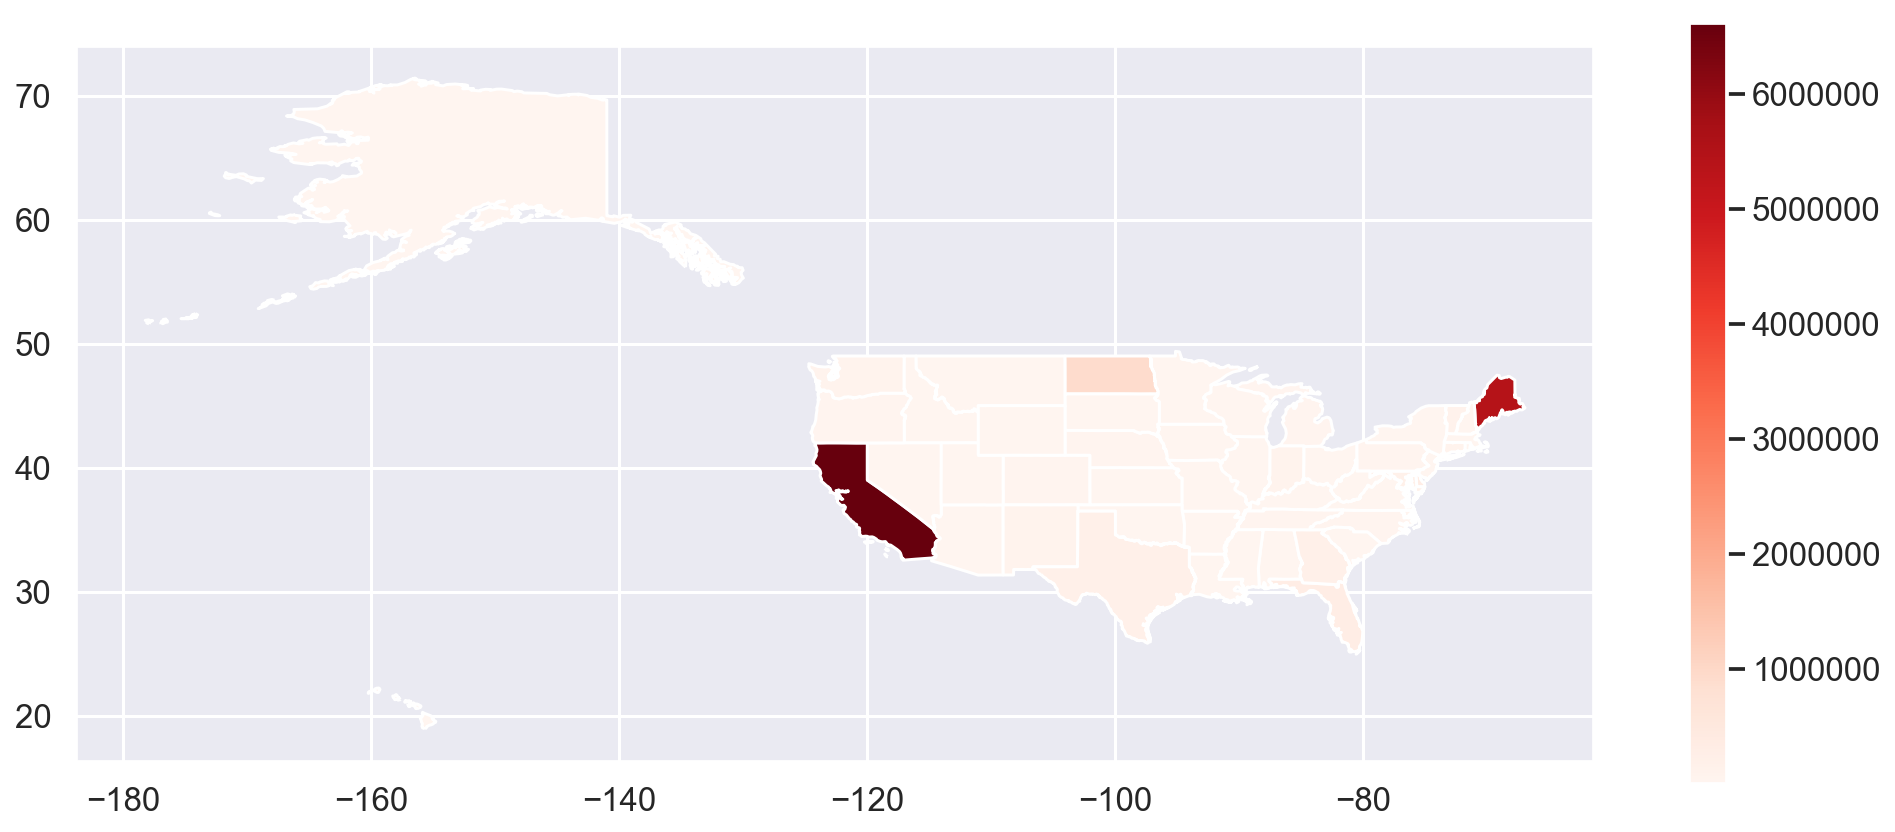

In [28]:
# Bernie Sanders
# Color each state based on total funds raised
usa = usa.sort_values(by=['STATE_NAME'])
ig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
usa.plot(column=BSMerged3['contribution_receipt_amount'],ax=ax, cmap='Reds', legend=True);

# Beto O'Rourke
# Color each state based on total funds raised
usa = usa.sort_values(by=['STATE_NAME'])
ig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
usa.plot(column=BOMerged3['contribution_receipt_amount'],ax=ax, cmap='Reds', legend=True);

# Kamala Harris
# Color each state based on total funds raised
usa = usa.sort_values(by=['STATE_NAME'])
ig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
usa.plot(column=KHMerged3['contribution_receipt_amount'],ax=ax, cmap='Reds', legend=True);

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*